In [ ]:
#@title Functions
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

def fhn_derivadas(variaveis, current = 10.0):
    oneoverepsilon = 100.0 
    zeta = 0.9
    q1 = oneoverepsilon*(variaveis[0]*(1-variaveis[0]*variaveis[0]/3.)-variaveis[1] + current)
    q2 = variaveis[0] + zeta 
    q=np.array([q1,q2])
    return q

def fhn_derivada(variaveis, current = 10.0):
    a = 0.7
    b = 0.8
    c = 0.08

    q1 = variaveis[0] - variaveis[0]**3 / 3 - variaveis[1] + current
    q2 = c * (variaveis[0] +a - b * variaveis[1])
    q=np.array([q1,q2])
    return q

def HH_derivadas(variaveis, I = 0):
    gk = 36.
    gna = 120.
    gl = .3
    Ek = -12.
    Ena = 115.
    El = 10.613
    Cm = 1.
    
    alpha_m = 0.1 * (25 - variaveis[0]) / (np.exp((25 - variaveis[0]) / 10) - 1)
    beta_m = 4 * np.exp(-variaveis[0] / 18)
    alpha_n = 0.01 * (10 - variaveis[0]) / (np.exp((10 - variaveis[0])  /10) - 1)
    beta_n = 0.125 * np.exp(-variaveis[0] / 80)
    alpha_h = 0.07 * np.exp(-variaveis[0] / 20)
    beta_h = 1 / (np.exp(3 - variaveis[0] / 10) + 1)
    
    V = (1/Cm) * (gk * variaveis[3]**4 * (Ek - variaveis[0]) + gna * variaveis[1]**3 * variaveis[2] * (Ena - variaveis[0])
                 + gl * (El - variaveis[0]) + I)
    m = alpha_m * (1 - variaveis[1]) - beta_m * variaveis[1]
    h = alpha_h * (1 - variaveis[2]) - beta_h * variaveis[2]
    n = alpha_n * (1 - variaveis[3]) - beta_n * variaveis[3]
    
    q=np.array([V, m, h, n])
    return q

def rk4(ODE, variaveis, corrente, tempo, deltat):
    
    dim = len(variaveis)
    k1 = np.zeros([1,dim])
    k2 = np.zeros([1,dim])
    k3 = np.zeros([1,dim])
    k4 = np.zeros([1,dim])
    
    deri = ODE(variaveis, corrente)
    k1 = deltat*deri
    aux = 0.5*k1 + variaveis

    deri = ODE(aux, corrente)
    k2 = deltat*deri
    aux = k2*0.5+ variaveis
    
    deri = ODE(aux, corrente)
    k3 = deltat*deri
    aux = k3+variaveis
    
    deri = ODE(aux, corrente)
    k4 = deltat*deri
    
    variaveis_novas = variaveis + (k1+2*k2+2*k3+k4)/6.0

    return variaveis_novas

def simula(ODE, corrente, dt, t, x0):
    passos = round(t / dt)
    
    x = np.zeros([passos+1,len(x0)])
    x[0] = x0
    
    xvelho = np.array(x[0])
    xnovo = np.array(x[0])
    
    for i in range(passos+1):
        xnovo[:] = rk4(ODE, xvelho, corrente[i], t, dt)
        x[i,:] = xnovo
        xvelho[:] = xnovo
    
    return x


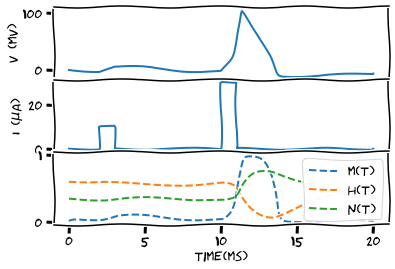

In [ ]:
#@title Reproduzindo a Fig. 2.15 do Izhikevich

f= open("Izhi.dat","w+")
with plt.xkcd():
  fig, (axis1, axis2, axis3) = plt.subplots(3,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=20

corrente = np.zeros(1+round(tempo / dt))

for i in range(round(1/dt)):
    corrente[round(2/dt) + i] =  10
    
for i in range(round(1/dt)):
    corrente[round(10/dt) + i] =  30

V0 = 0.
m0 = .015
h0 = .6
n0 = .35

init = [V0, m0, h0, n0]

q=simula(HH_derivadas, corrente, dt, tempo, init)

t=dt*np.arange(1+round(tempo/dt))

for i in range(len(q[:,0])):
  f.write("%f %f %f %f %f %d\n" % 
          (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()

with plt.xkcd():
  axis1.plot(t,q[:,0],'-')
  axis1.set_ylabel('V (mV)')

  axis2.plot(t,corrente)
  axis2.set_ylabel(r'I ($\mu$A)')

  axis3.plot(t,q[:,1],'--', label = "m(t)")
  axis3.plot(t,q[:,2],'--', label = "h(t)")
  axis3.plot(t,q[:,3],'--', label = "n(t)")
  axis3.set_xlabel('time(ms)')
  axis3.legend()

  plt.savefig('reproIzhi')
  plt.show()

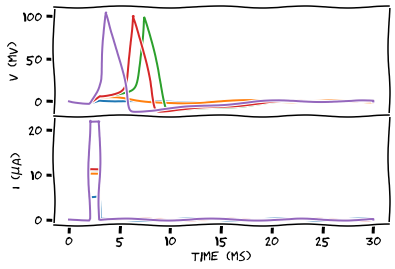

In [ ]:
#@title Exercícios 1 e 2

f= open("ex12.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=30

corrente = np.zeros(1+round(tempo / dt))

As = [5, 10, 10.8, 11, 22]
for A in As:
    for i in range(round(1/dt)):
        corrente[round(2/dt) + i] =  A

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    

    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(A) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')

    for i in range(len(q[:,0])):
      f.write("%f %f %f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()
#ax1.legend()
with plt.xkcd():
  plt.savefig('ex12')
  plt.show()


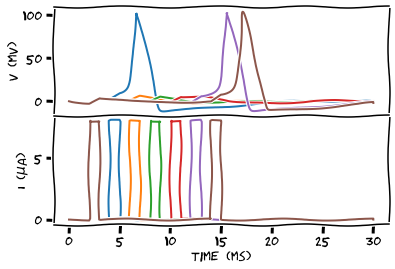

In [ ]:
#@title Exercícios 3 e 4

f= open("ex34.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=30

corrente = np.zeros(1+round(tempo / dt))

A = 8
p1 = 2
p2 = p1
while(p2 - p1 <= 10):
    corrente = np.zeros(1+round(tempo / dt))
    
    p2 += 2
    for i in range(round(1/dt)):
        corrente[round(p1/dt) + i] =  A
    for i in range(round(1/dt)):
        corrente[round(p2/dt) + i] =  A

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(A) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')
    for i in range(len(q[:,0])):
      f.write("%f %f %f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()
#ax1.legend()
with plt.xkcd():
  plt.savefig('ex34')
  plt.show()


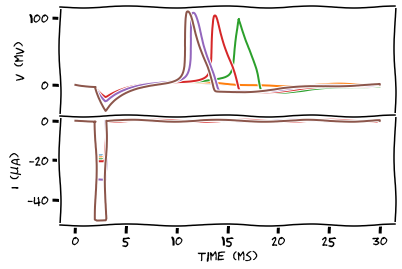

In [ ]:
#@title Exercício 5
#@markdown Sei lá o que eu quero escrever.

f= open("ex5.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=30

corrente = np.zeros(1+round(tempo / dt))

As = [18, 19, 20, 21, 30, 50]
for A in As:
    for i in range(round(1/dt)):
        corrente[round(2/dt) + i] =  -A

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(A) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')

    for i in range(len(q[:,0])):
      f.write("%f %f %f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()
# ax1.legend()
with plt.xkcd():
  plt.savefig('ex5')
  plt.show()

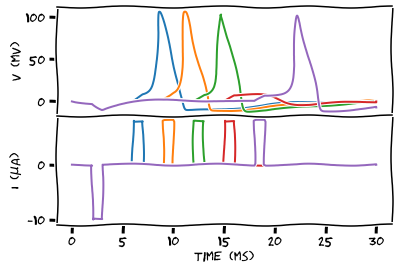

In [ ]:
#@title Exercício 6

f= open("ex6.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=30

corrente = np.zeros(1+round(tempo / dt))

Aneg = -10
Apos = 8
p1 = 2
p2 = p1 + 1

while(p2 - p1 <= 15):
    corrente = np.zeros(1+round(tempo / dt))
    
    p2 += 3
    for i in range(round(1/dt)):
        corrente[round(p1/dt) + i] =  Aneg
    for i in range(round(1/dt)):
        corrente[round(p2/dt) + i] =  Apos

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    
    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(p2-p1+1) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')

    for i in range(len(q[:,0])):
      f.write("%f %f %f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()
#ax1.legend()
with plt.xkcd():
  plt.savefig('ex6')
  plt.show()


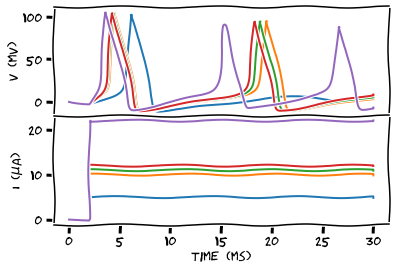

In [ ]:
#@title Exercício 7

f= open("ex7.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=30

corrente = np.zeros(1+round(tempo / dt))

As = [5, 10, 11, 12, 22]
for A in As:
    corrente[round(2/dt):] =  A

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    
    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(A) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')

    for i in range(len(q[:,0])):
      f.write("%f %f %f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], q[i,2], q[i,3], corrente[i]))

f.close()
# ax1.legend()
with plt.xkcd():
  plt.savefig('ex7')
  plt.show()


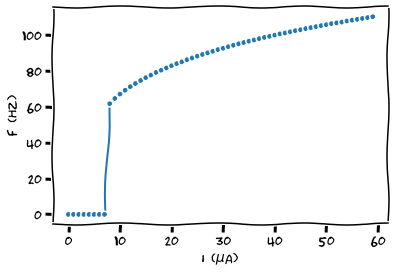

In [ ]:
#@title Exercício 8

freq = []

dt=0.01
tempo=20

corrente = np.zeros(1+round(tempo / dt))

As = np.arange(0,60, 1)#[5, 10, 11, 12, 22]
for A in As:
    corrente[:] =  A

    V0 = 0.
    m0 = .015
    h0 = .6
    n0 = .35

    init = [V0, m0, h0, n0]

    q=simula(HH_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    c = (np.diff(np.sign(np.diff(q[:,0]))) < 0).nonzero()[0] + 1 
        # local max
    
    if len(c) >= 2 and q[c[1],0] > 20:
        freq.append(1000 / (t[c[1]]-t[c[0]]))
    else:
        freq.append(0)

f= open("ex8.dat","w+")

for i in range(len(As)):
    f.write("%f %f\n" % (As[i], freq[i]))

f.close()
with plt.xkcd():
  plt.ylabel('f (Hz)')
  plt.xlabel(r'I ($\mu$A)')
  plt.plot(As,freq,'.-')
  plt.savefig('ex8')
  plt.show()

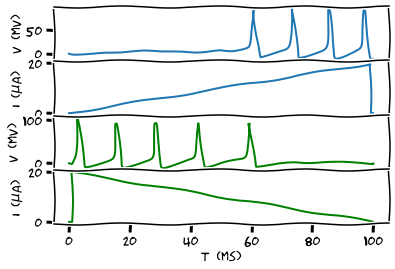

In [ ]:
#@title Exercício 9 (part I)

freq = []

with plt.xkcd():
  fig, ax = plt.subplots(4,1)#, sharex=True)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo=100

step = 0.002

corrente1 = np.zeros(1+round(tempo / dt))

for i in range(len(corrente1[:-round(1/dt)])):
    corrente1[i] +=  i*step

corrente2 = np.zeros(1+round(tempo / dt))

corrente2[round(1/dt):] =  len(corrente2[round(1/dt):]) * step

for i in range(len(corrente2[round(1/dt):])):
    corrente2[i+round(1/dt)] -=  i*step

V0 = 0.
m0 = .015
h0 = .6
n0 = .35

init = [V0, m0, h0, n0]

q1=simula(HH_derivadas, corrente1, dt, tempo, init)
q2=simula(HH_derivadas, corrente2, dt, tempo, init)

t=dt*np.arange(1+round(tempo/dt))

c1 = (np.diff(np.sign(np.diff(q1[:,0]))) < 0).nonzero()[0] + 1 
   # local max
c2 = (np.diff(np.sign(np.diff(q2[:,0]))) < 0).nonzero()[0] + 1 
   # local max

with plt.xkcd():
  ax[0].plot(t,q1[:,0],'-')
  ax[0].set_ylabel('V (mV)')

  ax[1].plot(t,corrente1)
  ax[1].set_ylabel(r'I ($\mu$A)')

  ax[2].plot(t,q2[:,0],'g-')
  ax[2].set_ylabel('V (mV)')

  ax[3].plot(t,corrente2, 'g-')
  ax[3].set_ylabel(r'I ($\mu$A)')
  ax[3].set_xlabel('t (ms)')
# f= open("ex8.dat","w+")

# for i in range(len(As)):
#     f.write("%f %f\n" % (As[i], freq[i]))

# f.close()

# plt.ylabel('f (Hz)')
# plt.xlabel(r'I ($\mu$A)')
# plt.plot(As,freq,'.')
with plt.xkcd():
  plt.savefig('ex9')
  plt.show()

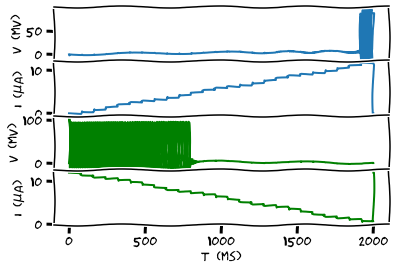

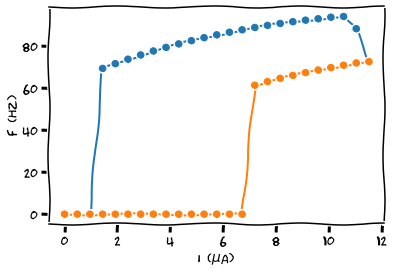

In [ ]:
#@title Exercício 9 (part II)

cor = []
freq = []

with plt.xkcd():
  fig, ax = plt.subplots(4,1)#, sharex=True)
  fig.subplots_adjust(hspace=0)

dt=0.01
tempo= 2000

st = 80
corrente_final = 12
step = corrente_final/(tempo // st)

corrente1 = np.zeros(1+round(tempo / dt))

i = 0
for j in range(tempo//st):
    corrente1[round(i/dt):round((i+st)/dt)] += (i / st) * step
    i += st

corrente2 = np.zeros(1+round(tempo / dt))

corrente2[:] = corrente_final

i = 0
for j in range(tempo//st):
    corrente2[round(i/dt):round((i+st)/dt)] -= (i / st) * step
    cor.append((i / st) * step)
    i += st

V0 = 0.
m0 = .015
h0 = .6
n0 = .35

init = [V0, m0, h0, n0]

q1=simula(HH_derivadas, corrente1, dt, tempo, init)
q2=simula(HH_derivadas, corrente2, dt, tempo, init)

t=dt*np.arange(1+round(tempo/dt))

c1 = (np.diff(np.sign(np.diff(q1[:,0]))) < 0).nonzero()[0] + 1 
   # local max
c2 = (np.diff(np.sign(np.diff(q2[:,0]))) < 0).nonzero()[0] + 1 
   # local max

freq1 = []
freq2 = []
i = 0
for j in range(tempo//st):
    qsliced1 = q1[round(i/dt):round((i+st)/dt)]
    qsliced2 = q2[round(i/dt):round((i+st)/dt)]
    csl1 = (np.diff(np.sign(np.diff(qsliced1[:,0]))) < 0).nonzero()[0] + 1 
        # local max
    csl2 = (np.diff(np.sign(np.diff(qsliced2[:,0]))) < 0).nonzero()[0] + 1 
      # local max
    # if len(csl1) >= 2 and (qsliced1[csl1[1],0] > 20) and (qsliced1[csl1[0],0] > 20):
    #     freq1.append(1000 / (t[csl1[1]] - t[csl1[0]]))
    # else:
    #     freq1.append(0)
    # if len(csl2) >= 2 and (qsliced2[csl2[1],0] > 20) and (qsliced2[csl2[0],0] > 20):
    #     freq2.append(1000 / (t[csl2[1]] - t[csl2[0]]))
    # else:
    #     freq2.append(0)
    # i += st
    t_peaks = []
    if len(csl1) > 2:
      for j in csl1:
        if qsliced1[j,0] > 1.0:
          t_peaks.append(t[j])
      if (len(t_peaks) > 2):
        isi = np.diff(t_peaks) / 1000
        freq_aux = 1 / np.mean(isi)
        freq1.append(freq_aux)
      else:
        freq1.append(0)
    else:
      freq1.append(0)
    t_peaks = []
    if len(csl2) > 3:
      for j in csl2:
        if qsliced2[j,0] > 20.0:
          t_peaks.append(t[j])
      if (len(t_peaks) > 3):
        isi = np.diff(t_peaks) / 1000
        freq_aux = 1 / np.mean(isi)
        freq2.append(freq_aux)
      else:
        freq2.append(0)
    else:
      freq2.append(0)
    i += st

with plt.xkcd():    
  ax[0].plot(t,q1[:,0],'-')
  ax[0].set_ylabel('V (mV)')

  ax[1].plot(t,corrente1)
  ax[1].set_ylabel(r'I ($\mu$A)')

  ax[2].plot(t,q2[:,0],'g-')
  ax[2].set_ylabel('V (mV)')

  ax[3].plot(t,corrente2, 'g-')
  ax[3].set_ylabel(r'I ($\mu$A)')
  ax[3].set_xlabel('t (ms)')
  # f= open("ex8.dat","w+")

  # for i in range(len(As)):
  #     f.write("%f %f\n" % (As[i], freq[i]))

  # f.close()

  plt.savefig('ex9 (1)')
  plt.show()
  plt.ylabel('f (Hz)')
  plt.xlabel(r'I ($\mu$A)')
  plt.plot(cor,freq1,'o-')
  plt.plot(cor,freq2[::-1],'o-')
  plt.savefig('histereseex9')
  plt.show()

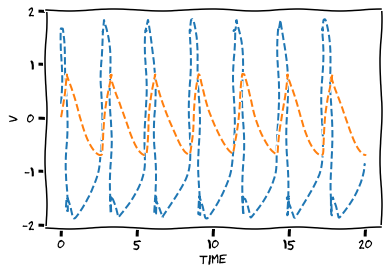

In [ ]:
#@title FHN

dt=0.01
tempo=20

## Corrente DC 10 mu A
corrente = np.ones(1+round(tempo / dt)) * 10

V0 = 0.1
m0 = 10

init = [V0, m0]

q=simula(fhn_derivadas, corrente, dt, tempo, init)

t=dt*np.arange(1+round(tempo/dt))

with plt.xkcd():
  plt.ylabel('V')
  plt.xlabel('time')
  plt.plot(t,q[:,0],'--')
  plt.plot(t,q[:,1] - 10,'--')
  plt.show()

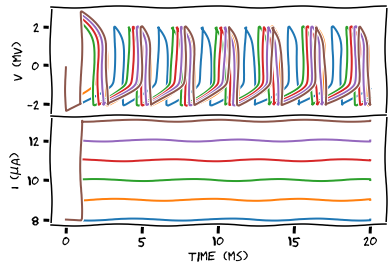

In [ ]:
#@title Exercício 10

f= open("ex10.dat","w+")

with plt.xkcd():
  fig, (ax1, ax2) = plt.subplots(2,1)
  fig.subplots_adjust(hspace=0)

dt=0.001
tempo=20

corrente = np.ones(1+round(tempo / dt)) * 8

As = np.arange(8,14,1)
for A in As:
    corrente[round(1 / dt):] =  A

    V0 = 0.1
    m0 = 10

    init = [V0, m0]

    q=simula(fhn_derivadas, corrente, dt, tempo, init)

    t=dt*np.arange(1+round(tempo/dt))
    
    with plt.xkcd():
      ax2.plot(t,corrente)
      ax2.set_xlabel('time (ms)')
      ax2.set_ylabel(r'I ($\mu$A)')

      ax1.plot(t,q[:,0],'-', label = str(A) + r' $\mu$A/cm$^2$')
      ax1.set_ylabel(r'V (mV)')

    for i in range(len(q[:,0])):
      f.write("%f %f %f %d\n" % 
              (t[i], q[i,0], q[i,1], corrente[i]))

f.close()
# ax1.legend()
with plt.xkcd():
  plt.savefig('ex10')
  plt.show()

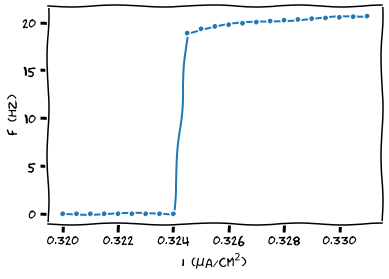

In [ ]:
#@title Exercício 11

freq = []

dt = 0.01
tempo = 300

corrente = np.zeros(1+round(tempo / dt))

As = np.arange(0.32,0.331, 0.0005) #[5, 10, 11, 12, 22]

for A in As:
    corrente[round(0.5/dt):] =  A

    V0 = 0.
    m0 = 0.

    init = [V0, m0]

    q=simula(fhn_derivada, corrente, dt, tempo, init)
    t = dt*np.arange(1+round(tempo/dt))
    c = (np.diff(np.sign(np.diff(q[:,0]))) < 0).nonzero()[0]+1
    # aqui tem os indices do picos
    # print(q[c,0])
    t_peaks = []
    if len(c) > 3:
      for j in c:
        if q[j,0] > 1.0:
          t_peaks.append(t[j])
      if (len(t_peaks) > 3):
        isi = np.diff(t_peaks) / 1000
        freq_aux = 1 / np.mean(isi)
        freq.append(freq_aux)
      else:
        freq.append(0)
    else:
      freq.append(0)
    #plt.plot(t,q[:,0],'-')

# plt.show()
with plt.xkcd():
  plt.ylabel('f (Hz)')
  plt.xlabel(r'I ($\mu$A/cm$^2$)')
  plt.plot(As,freq,'.-')
  plt.show()

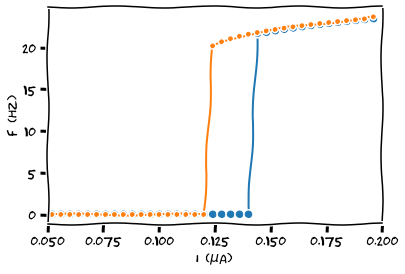

In [ ]:
#@title Exercício 12
#@markdown Eu consigo escrever o que eu quiser

cor = []
freq = []


dt=0.01
tempo= 10000

st = 200
corrente_final = 0.4
corrente_inicial = 0.2
step = (corrente_final-corrente_inicial)/(tempo // st)

corrente1 = np.ones(1+round(tempo / dt)) * corrente_inicial

i = 0
for j in range(tempo//st):
    corrente1[round(i/dt):round((i+st)/dt)] += (i / st) * step
    i += st

corrente2 = np.ones(1+round(tempo / dt)) * corrente_final

i = 0
for j in range(tempo//st):
    corrente2[round(i/dt):round((i+st)/dt)] -= (i / st) * step
    cor.append((i / st) * step)
    i += st

V0 = 0.
m0 = 0.

init = [V0, m0]

q1=simula(fhn_derivada, corrente1, dt, tempo, init)
q2=simula(fhn_derivada, corrente2, dt, tempo, init)

t = dt*np.arange(1+round(tempo/dt))

freq1 = []
freq2 = []
i = 0
for j in range(tempo//st):
    qsliced1 = q1[round(i/dt):round((i+st)/dt)]
    qsliced2 = q2[round(i/dt):round((i+st)/dt)]

    csl1 = (np.diff(np.sign(np.diff(qsliced1[:,0]))) < 0).nonzero()[0] + 1 
        # local max
    csl2 = (np.diff(np.sign(np.diff(qsliced2[:,0]))) < 0).nonzero()[0] + 1 
      # local max
    
    t_peaks = []
    if len(csl1) > 3:
      for j in csl1:
        if qsliced1[j,0] > 1.0:
          t_peaks.append(t[j])
      if (len(t_peaks) > 3):
        isi = np.diff(t_peaks) / 1000
        freq_aux = 1 / np.mean(isi)
        freq1.append(freq_aux)
      else:
        freq1.append(0)
    else:
      freq1.append(0)
    t_peaks = []
    if len(csl2) > 3:
      for j in csl2:
        if qsliced2[j,0] > 1.0:
          t_peaks.append(t[j])
      if (len(t_peaks) > 3):
        isi = np.diff(t_peaks) / 1000
        freq_aux = 1 / np.mean(isi)
        freq2.append(freq_aux)
      else:
        freq2.append(0)
    else:
      freq2.append(0)
    i += st

with plt.xkcd():
  plt.ylabel('f (Hz)')
  plt.xlabel(r'I ($\mu$A)')
  plt.xlim(left = 0.05, right = 0.2)
  plt.plot(cor,freq1,'o-')
  plt.plot(cor,freq2[::-1],'.-')
  plt.savefig('histereseex11')
  plt.show()